In [2]:
# imports
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 1.Test the "Credit Card Default" Dataset

In [45]:
df = pd.read_csv('Data/5.default of credit card clients.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [46]:
X = df.drop(['default payment next month'], axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# Print what the theory says for k, given an Ɛ
# for n=df.shape[0] instances, dimension d=12 (features)
print ("Professors Johnson and Lindenstrauss say: k >=", johnson_lindenstrauss_min_dim(df.shape[0],eps=0.1))

Professors Johnson and Lindenstrauss say: k >= 8836


In [52]:
model = LinearSVC()
model.fit(X_train, y_train)
baseline = metrics.accuracy_score(model.predict(X_test), y_test)
print(f'The baseline Acc: {baseline}')

The baseline Acc: 0.8


In [53]:
# Loop over the projection sizes, k
accuracies = []
dims = list(range(2, X_test.shape[1]+1))

for dim in dims:
    # Create random projection
    sp = SparseRandomProjection(n_components = dim)
    XRP = sp.fit_transform(X_train)
 
    # Train classifier of your choice on the sparse random projection
    model = LinearSVC()
    model.fit(XRP, y_train)
 
    # Evaluate model and update accuracies
    test = sp.transform(X_test)
    accuracies.append(metrics.accuracy_score(model.predict(test), y_test))

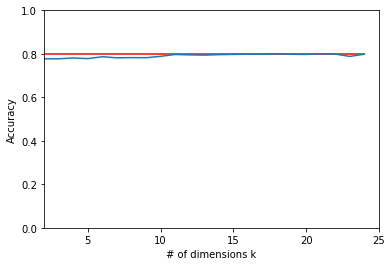

In [57]:
# Create figure
plt.figure()
plt.xlabel("# of dimensions k")
plt.ylabel("Accuracy")
plt.xlim([2, X_test.shape[1]+1])
plt.ylim([0, 1])
 
# Plot baseline and random projection accuracies
plt.plot(dims, [baseline] * len(accuracies), color = "r")
plt.plot(dims, accuracies)

plt.show()

## 2.Test the "Dry Bean Dataset"

In [27]:
df = pd.read_csv('Data/6.Dry_Bean_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [24]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Print what the theory says for k, given an Ɛ
# for n=df.shape[0] instances, dimension d=12 (features)
print ("Professors Johnson and Lindenstrauss say: k >=", johnson_lindenstrauss_min_dim(df.shape[0],eps=0.1))

Professors Johnson and Lindenstrauss say: k >= 8158


In [39]:
model = svm.SVC(kernel = 'rbf')
model.fit(X_train, y_train)
baseline = metrics.accuracy_score(model.predict(X_test), y_test)
print(f'The baseline Acc: {baseline}')

The baseline Acc: 0.9370714985308521


In [42]:
# Loop over the projection sizes, k
accuracies = []
dims = list(range(2, X_test.shape[1]+1))

for dim in dims:
    # Create random projection
    sp = SparseRandomProjection(n_components = dim)
    XRP = sp.fit_transform(X_train)
 
    # Train classifier of your choice on the sparse random projection
    model = svm.SVC(kernel = 'rbf')
    model.fit(XRP, y_train)
 
    # Evaluate model and update accuracies
    test = sp.transform(X_test)
    accuracies.append(metrics.accuracy_score(model.predict(test), y_test))

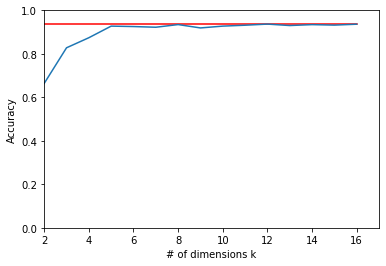

In [44]:
# Create figure
plt.figure()
plt.xlabel("# of dimensions k")
plt.ylabel("Accuracy")
plt.xlim([2, X_test.shape[1]+1])
plt.ylim([0, 1])
 
# Plot baseline and random projection accuracies
plt.plot(dims, [baseline] * len(accuracies), color = "r")
plt.plot(dims, accuracies)

plt.show()

## 3.Test the "Anuran Calls Dataset"

In [4]:
df = pd.read_csv('Data/7.Anuran Calls.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [5]:
X = df.drop(['Family', 'Genus', 'Species'], axis=1)
y = df['RecordID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print ("Professors Johnson and Lindenstrauss say: k >=", johnson_lindenstrauss_min_dim(df.shape[0],eps=0.1))

Professors Johnson and Lindenstrauss say: k >= 7612


In [69]:
model = svm.SVC(kernel = 'rbf')
model.fit(X_train, y_train)
baseline = metrics.accuracy_score(model.predict(X_test), y_test)
print(f'The baseline Acc: {baseline}')

The baseline Acc: 0.8767948124131543


In [79]:
# Loop over the projection sizes, k
accuracies = []
dims = list(range(2, X_test.shape[1]+30, 5))

for dim in dims:
    # Create random projection
    sp = SparseRandomProjection(n_components = dim)
    XRP = sp.fit_transform(X_train)
 
    # Train classifier of your choice on the sparse random projection
    model = svm.SVC(kernel = 'rbf')
    model.fit(XRP, y_train)
 
    # Evaluate model and update accuracies
    test = sp.transform(X_test)
    accuracies.append(metrics.accuracy_score(model.predict(test), y_test))

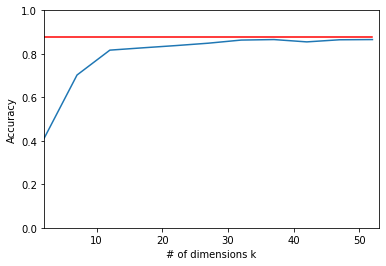

In [80]:
# Create figure
plt.figure()
plt.xlabel("# of dimensions k")
plt.ylabel("Accuracy")
plt.xlim([2, X_test.shape[1]+30])
plt.ylim([0, 1])
 
# Plot baseline and random projection accuracies
plt.plot(dims, [baseline] * len(accuracies), color = "r")
plt.plot(dims, accuracies)

plt.show()